Situación Problema

Rodrigo Goff Peniche A00828816

Visualización de datos para la toma de decisiones

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from matplotlib.pyplot import figure

In [5]:
dataframe = pd.read_csv('cardsInfo.csv')

In [6]:
 df = dataframe.iloc[:300,:]

In [7]:
%ls datasets

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       reg_data.csv
Book3.csv                  headbrain.csv  sample_pivot.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


In [8]:
df.columns

Index(['Unnamed: 0', 'id', 'elixir', 'link', 'name', 'level1', 'hitpoints1',
       'damage1', 'level2', 'hitpoints2', 'damage2', 'level3', 'hitpoints3',
       'damage3', 'level4', 'hitpoints4', 'damage4', 'level5', 'hitpoints5',
       'damage5', 'level6', 'hitpoints6', 'damage6', 'level7', 'hitpoints7',
       'damage7', 'level8', 'hitpoints8', 'damage8', 'level9', 'hitpoints9',
       'damage9', 'level10', 'hitpoints10', 'damage10', 'level11',
       'hitpoints11', 'damage11', 'level12', 'hitpoints12', 'damage12',
       'level13', 'hitpoints13', 'damage13', 'level14', 'hitpoints14',
       'damage14'],
      dtype='object')

In [9]:
df.head()

,Unnamed: 0,id,elixir,link,name,level1,hitpoints1,damage1,level2,hitpoints2,...,damage11,level12,hitpoints12,damage12,level13,hitpoints13,damage13,level14,hitpoints14,damage14
0,0,Skellies,1,https://www.deckshop.pro/card/detail/Skellies,Skeletons,1,32.0,96.0,2,35.0,...,243.0,12,89.0,267.0,13,98.0,294.0,14,108.0,324.0
1,1,IceSpirit,1,https://www.deckshop.pro/card/detail/IceSpirit,Ice Spirit,1,90.0,43.0,2,99.0,...,110.0,12,252.0,120.0,13,278.0,132.0,14,305.0,145.0
2,2,Heal,1,https://www.deckshop.pro/card/detail/Heal,Heal,1,0.0,0.0,2,0.0,...,0.0,12,0.0,0.0,13,0.0,0.0,14,0.0,0.0
3,3,Gobs,2,https://www.deckshop.pro/card/detail/Gobs,Goblins,1,79.0,141.0,2,86.0,...,360.0,12,221.0,396.0,13,244.0,435.0,14,267.0,477.0
4,4,SpearGobs,2,https://www.deckshop.pro/card/detail/SpearGobs,Spear Goblins,1,52.0,96.0,2,57.0,...,243.0,12,146.0,267.0,13,160.0,294.0,14,176.0,324.0


In [10]:
df.shape

(95, 47)

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.columns


Index(['Unnamed: 0', 'id', 'elixir', 'link', 'name', 'level1', 'hitpoints1',
       'damage1', 'level2', 'hitpoints2', 'damage2', 'level3', 'hitpoints3',
       'damage3', 'level4', 'hitpoints4', 'damage4', 'level5', 'hitpoints5',
       'damage5', 'level6', 'hitpoints6', 'damage6', 'level7', 'hitpoints7',
       'damage7', 'level8', 'hitpoints8', 'damage8', 'level9', 'hitpoints9',
       'damage9', 'level10', 'hitpoints10', 'damage10', 'level11',
       'hitpoints11', 'damage11', 'level12', 'hitpoints12', 'damage12',
       'level13', 'hitpoints13', 'damage13', 'level14', 'hitpoints14',
       'damage14'],
      dtype='object')

## Existe una relación entre hitpoints1 y hitpoints2? Cambia algo con el damage1?

Text(0.5, 1.0, 'Relación entre hitpoints1 y hitpoints2')

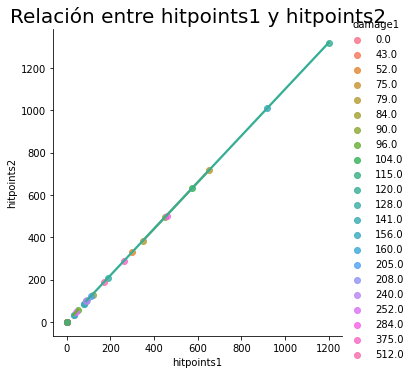

In [14]:
sns.lmplot(x = 'hitpoints1',
           y = 'hitpoints2',
           data = df,
           fit_reg = True,
           hue = 'damage1'
          )
plt.title('Relación entre hitpoints1 y hitpoints2', fontsize = 20)

In [15]:
df.corr()

,Unnamed: 0,elixir,level1,hitpoints1,damage1,level2,hitpoints2,damage2,level3,hitpoints3,...,damage11,level12,hitpoints12,damage12,level13,hitpoints13,damage13,level14,hitpoints14,damage14
Unnamed: 0,1.000000,0.862259,NaN,0.005343,-0.092212,NaN,0.005534,-0.091396,NaN,0.089854,...,0.204782,NaN,0.562307,0.204851,NaN,0.562143,0.204507,NaN,0.515198,0.226391
elixir,0.862259,1.000000,NaN,0.080802,-0.022282,NaN,0.080934,-0.021502,NaN,0.185224,...,0.261163,NaN,0.626269,0.261069,NaN,0.626197,0.260884,NaN,0.539974,0.220656
level1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hitpoints1,0.005343,0.080802,NaN,1.000000,0.429167,NaN,0.999999,0.429854,NaN,0.506641,...,-0.037825,NaN,0.173501,-0.038155,NaN,0.174385,-0.038024,NaN,0.090318,-0.032814
damage1,-0.092212,-0.022282,NaN,0.429167,1.000000,NaN,0.428459,0.999994,NaN,0.079541,...,0.164338,NaN,-0.199970,0.164017,NaN,-0.199571,0.164641,NaN,-0.196157,0.298377
level2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hitpoints2,0.005534,0.080934,NaN,0.999999,0.428459,NaN,1.000000,0.429148,NaN,0.506779,...,-0.037949,NaN,0.173774,-0.038281,NaN,0.174658,-0.038149,NaN,0.090606,-0.033025
damage2,-0.091396,-0.021502,NaN,0.429854,0.999994,NaN,0.429148,1.000000,NaN,0.080016,...,0.164377,NaN,-0.199599,0.164056,NaN,-0.199199,0.164679,NaN,-0.195860,0.298379
level3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hitpoints3,0.089854,0.185224,NaN,0.506641,0.079541,NaN,0.506779,0.080016,NaN,1.000000,...,0.062409,NaN,0.372801,0.061836,NaN,0.373971,0.062190,NaN,0.205894,-0.204061
